In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import models,layers


In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNEL=2
EPOCHS=10

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Datasets/PlantLeafs',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
   )

Found 2475 files belonging to 2 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [ ]:
len(dataset)

78

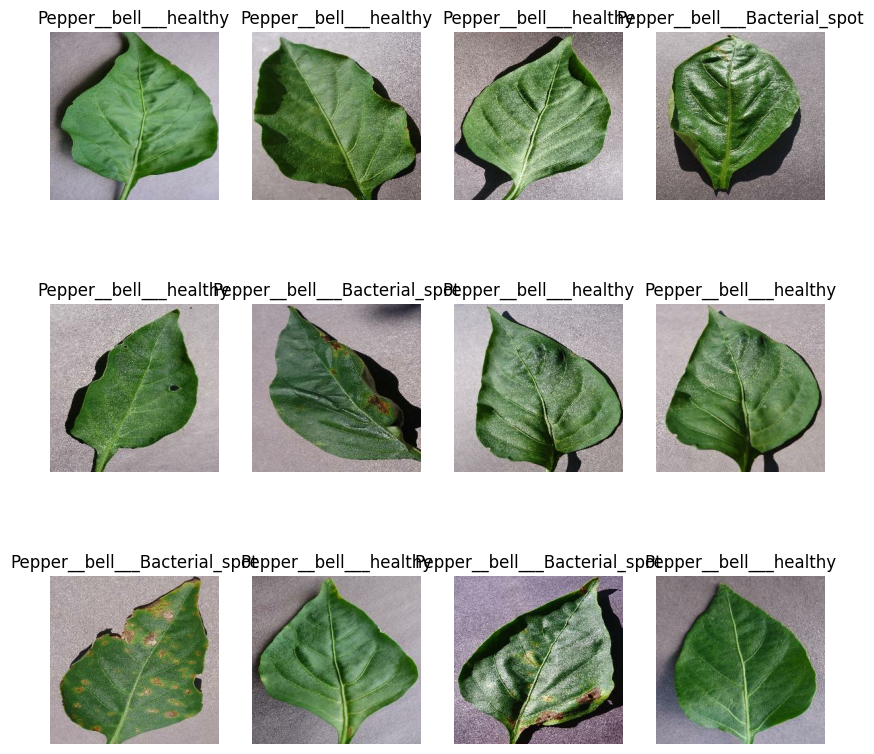

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [ ]:
train_size=0.8
len(dataset)*train_size

62.400000000000006

In [ ]:
train_ds=dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds=dataset.skip(54)
len(test_ds)

24

In [ ]:
val_size=0.1
len(dataset)*val_size

7.800000000000001

In [ ]:
val_ds=test_ds.take(6)
test_ds=test_ds.skip(6)

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
      ds = ds.shuffle(shuffle_size,seed=12)

    train_size=int(train_split*ds_size)
    val_size = int (val_split *ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds,val_ds,test_ds= get_dataset_partitions_tf(dataset)


In [ ]:
len(train_ds)

62

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
     layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augumentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
model= models.Sequential([
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64 , activation='relu'),
    layers.Dense(2 ,activation='softmax')

])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(train_ds,
                  epochs=EPOCHS,
          batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds,)


Epoch 1/10
62/62 [==============================] - 509s 5s/step - loss: 0.6853 - accuracy: 0.5869 - val_loss: 0.6391 - val_accuracy: 0.7101
Epoch 2/10
62/62 [==============================] - 317s 5s/step - loss: 0.5902 - accuracy: 0.7071 - val_loss: 0.7406 - val_accuracy: 0.6887
Epoch 3/10
62/62 [==============================] - 297s 5s/step - loss: 0.5151 - accuracy: 0.7616 - val_loss: 0.3407 - val_accuracy: 0.8594
Epoch 4/10
62/62 [==============================] - 297s 5s/step - loss: 0.2684 - accuracy: 0.8961 - val_loss: 0.2285 - val_accuracy: 0.9175
Epoch 5/10
62/62 [==============================] - 296s 5s/step - loss: 0.1481 - accuracy: 0.9496 - val_loss: 0.1305 - val_accuracy: 0.9552
Epoch 6/10
62/62 [==============================] - 297s 5s/step - loss: 0.1164 - accuracy: 0.9669 - val_loss: 0.0590 - val_accuracy: 0.9878
Epoch 7/10
62/62 [==============================] - 297s 5s/step - loss: 0.0551 - accuracy: 0.9873 - val_loss: 0.0685 - val_accuracy: 0.9776
Epoch 8/10
62

In [ ]:
scores=model.evaluate(test_ds)
scores

62/62 [==============================] - 89s 1s/step - loss: 0.0278 - accuracy: 0.9964


[0.027759641408920288, 0.9964340329170227]

In [ ]:
history.history['accuracy']

[0.5868568420410156,
 0.7070810198783875,
 0.7615894079208374,
 0.8960774540901184,
 0.9495669603347778,
 0.9668874144554138,
 0.9872643947601318,
 0.9857361316680908,
 0.9882832169532776,
 0.9852266907691956]

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']
acc

[0.5868568420410156,
 0.7070810198783875,
 0.7615894079208374,
 0.8960774540901184,
 0.9495669603347778,
 0.9668874144554138,
 0.9872643947601318,
 0.9857361316680908,
 0.9882832169532776,
 0.9852266907691956]

Text(0.5, 1.0, 'Training and Validation Accuracy')

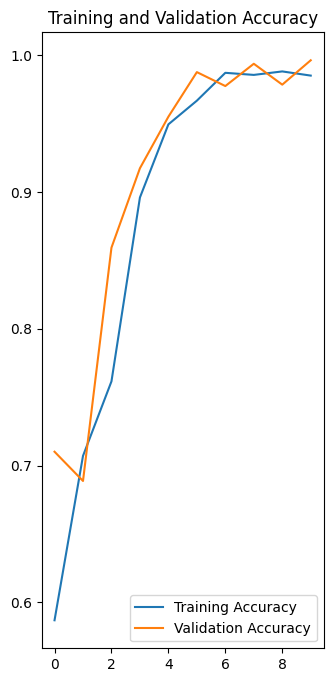

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10),acc,label='Training Accuracy')
plt.plot(range(10),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")



In [ ]:
import numpy as np

def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0)
  predictions= model.predict(img_array)
  predicted_class= class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])),2)
  return predicted_class, confidence

1/1 [==============================] - 0s 84ms/step


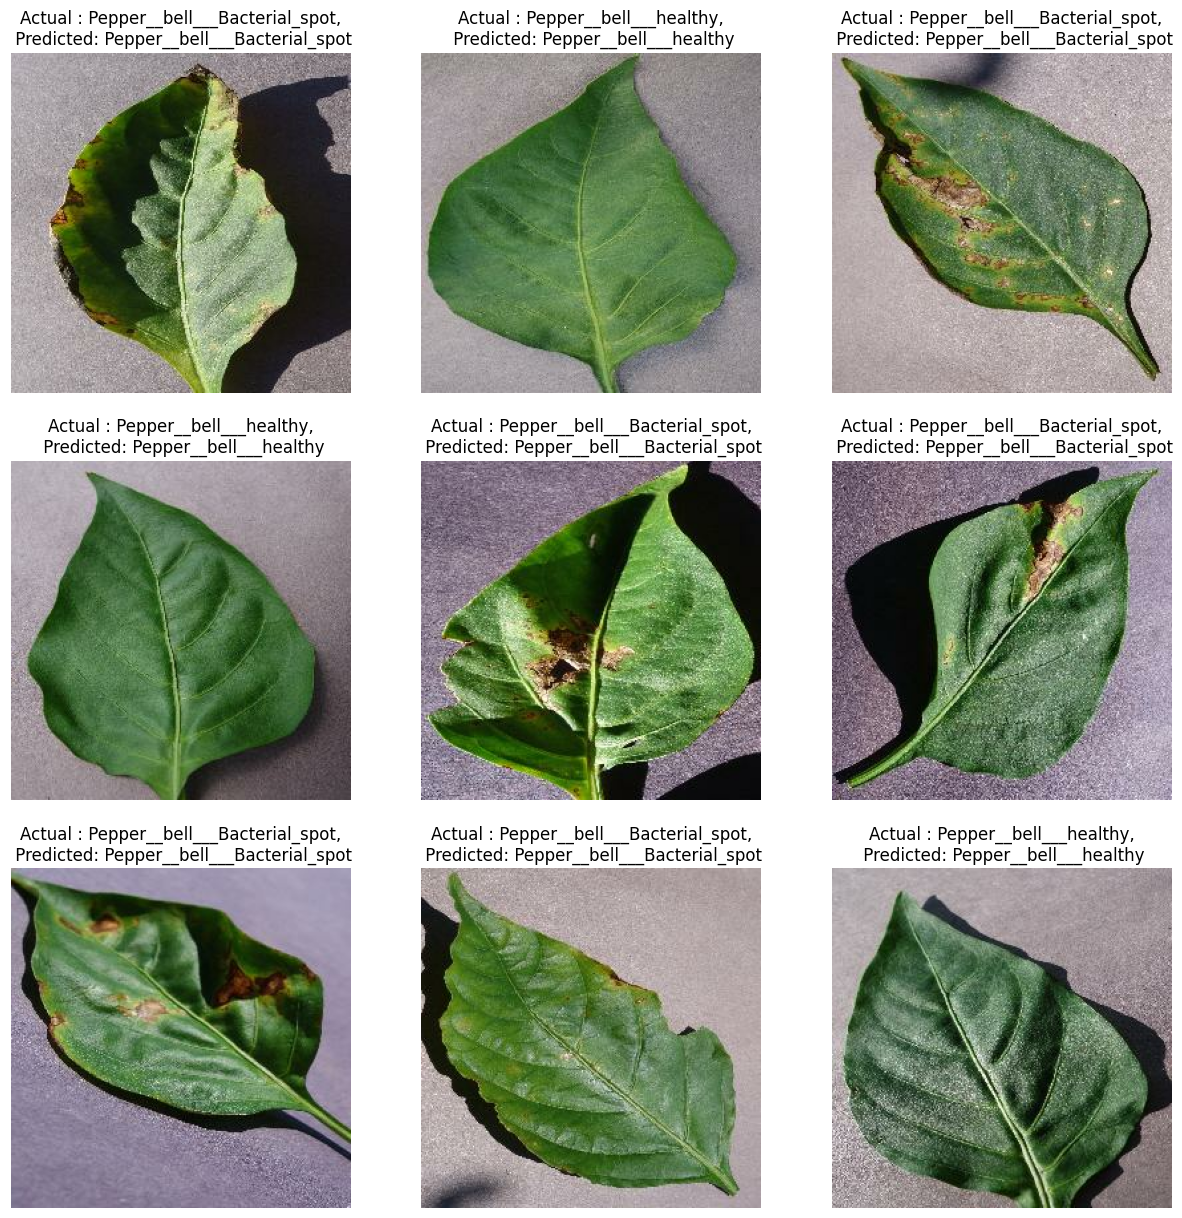

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence =predict(model,images[i].numpy())
        actual_class= class_names[labels[i]]
        plt.title(f"Actual : {actual_class},\n Predicted: {predicted_class}")
        plt.axis("off")
